# Looking for a shiny image <img align="right" src="../Supplementary_data/DE_Africa_Logo_Stacked_RGB_small.jpg">


* **Products used:** 
s2a_msil2a, s2b_msil2a

## Background
In the last two decades, we discovered that people like images with a mixture of water and green land.

## Description
This notebook will look for water and land
***

## Getting started
To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages

In [8]:
%matplotlib inline

import sys
import datacube
import matplotlib.pyplot as plt
from IPython.display import Image

sys.path.append('../Scripts')
from deafrica_plotting import animated_timeseries
from deafrica_plotting import rgb
from deafrica_datahandling import load_ard, mostcommon_crs
from deafrica_plotting import display_map

### Connect to the datacube

In [9]:
dc = datacube.Datacube(app='Image_segmentation')


### Analysis parameters

In [10]:
lat, lon =  6.5, -1.4    # lake Bosomtwe
#lat, lon =  8.73, -1.35   # Black Volta
#lat, lon =  8.7, -1.0     # Black Volta join
#lat, lon =  8.5, -2.4
#buffer = 0.075
lat, lon = 8.57, -2.4  # Bui Reservoir inlet

#lat, lon = 13.28, -16.15 #Senagal

buffer = 0.05

x = (lon - buffer, lon + buffer)
y =  (lat + buffer, lat - buffer)

# Create a reusable query
query = {
    'x': x,
    'y': y,
    #'time': ('2017-12', '2018-03-10'),
    'time': ('2017-10-10', '2018-03-10'),
    'resolution': (-30, 30)
}

### View the selected location

In [11]:
display_map(x=x, y=y)

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [15]:
#find the most common UTM crs for the location
output_crs = mostcommon_crs(dc=dc, product='s2a_msil2a', query=query)
print (output_crs)
# Load available data
ds = load_ard(dc=dc, 
              products=['s2a_msil2a', 's2b_msil2a'],
              measurements=['red', 'green', 'blue', 'nir_1', 'swir_1', 'swir_2'],
              group_by='solar_day',
              output_crs=output_crs, 
              min_gooddata=0.95,
              mask_pixel_quality=False,
              **query)

# Print output data
print(ds)

epsg:32630
Using pixel quality parameters for Sentinel 2
Finding datasets
    s2a_msil2a
    s2b_msil2a
Counting good quality pixels for each time step
Filtering to 19 out of 30 time steps with at least 95.0% good quality pixels
Loading 19 time steps
<xarray.Dataset>
Dimensions:  (time: 19, x: 369, y: 370)
Coordinates:
  * y        (y) float64 9.529e+05 9.529e+05 9.528e+05 ... 9.419e+05 9.418e+05
  * time     (time) datetime64[ns] 2017-10-17T10:40:55.822000 ... 2018-03-06T10:44:19.067000
  * x        (x) float64 5.605e+05 5.605e+05 5.606e+05 ... 5.715e+05 5.715e+05
Data variables:
    red      (time, y, x) float32 443.0 450.0 462.0 451.0 ... 805.0 663.0 634.0
    green    (time, y, x) float32 679.0 684.0 688.0 672.0 ... 991.0 837.0 630.0
    blue     (time, y, x) float32 259.0 274.0 256.0 261.0 ... 801.0 648.0 470.0
    nir_1    (time, y, x) float32 3087.0 3131.0 3073.0 ... 641.0 507.0 827.0
    swir_1   (time, y, x) float32 1671.0 1696.0 1685.0 ... 716.0 641.0 1200.0
    swir_2   (tim

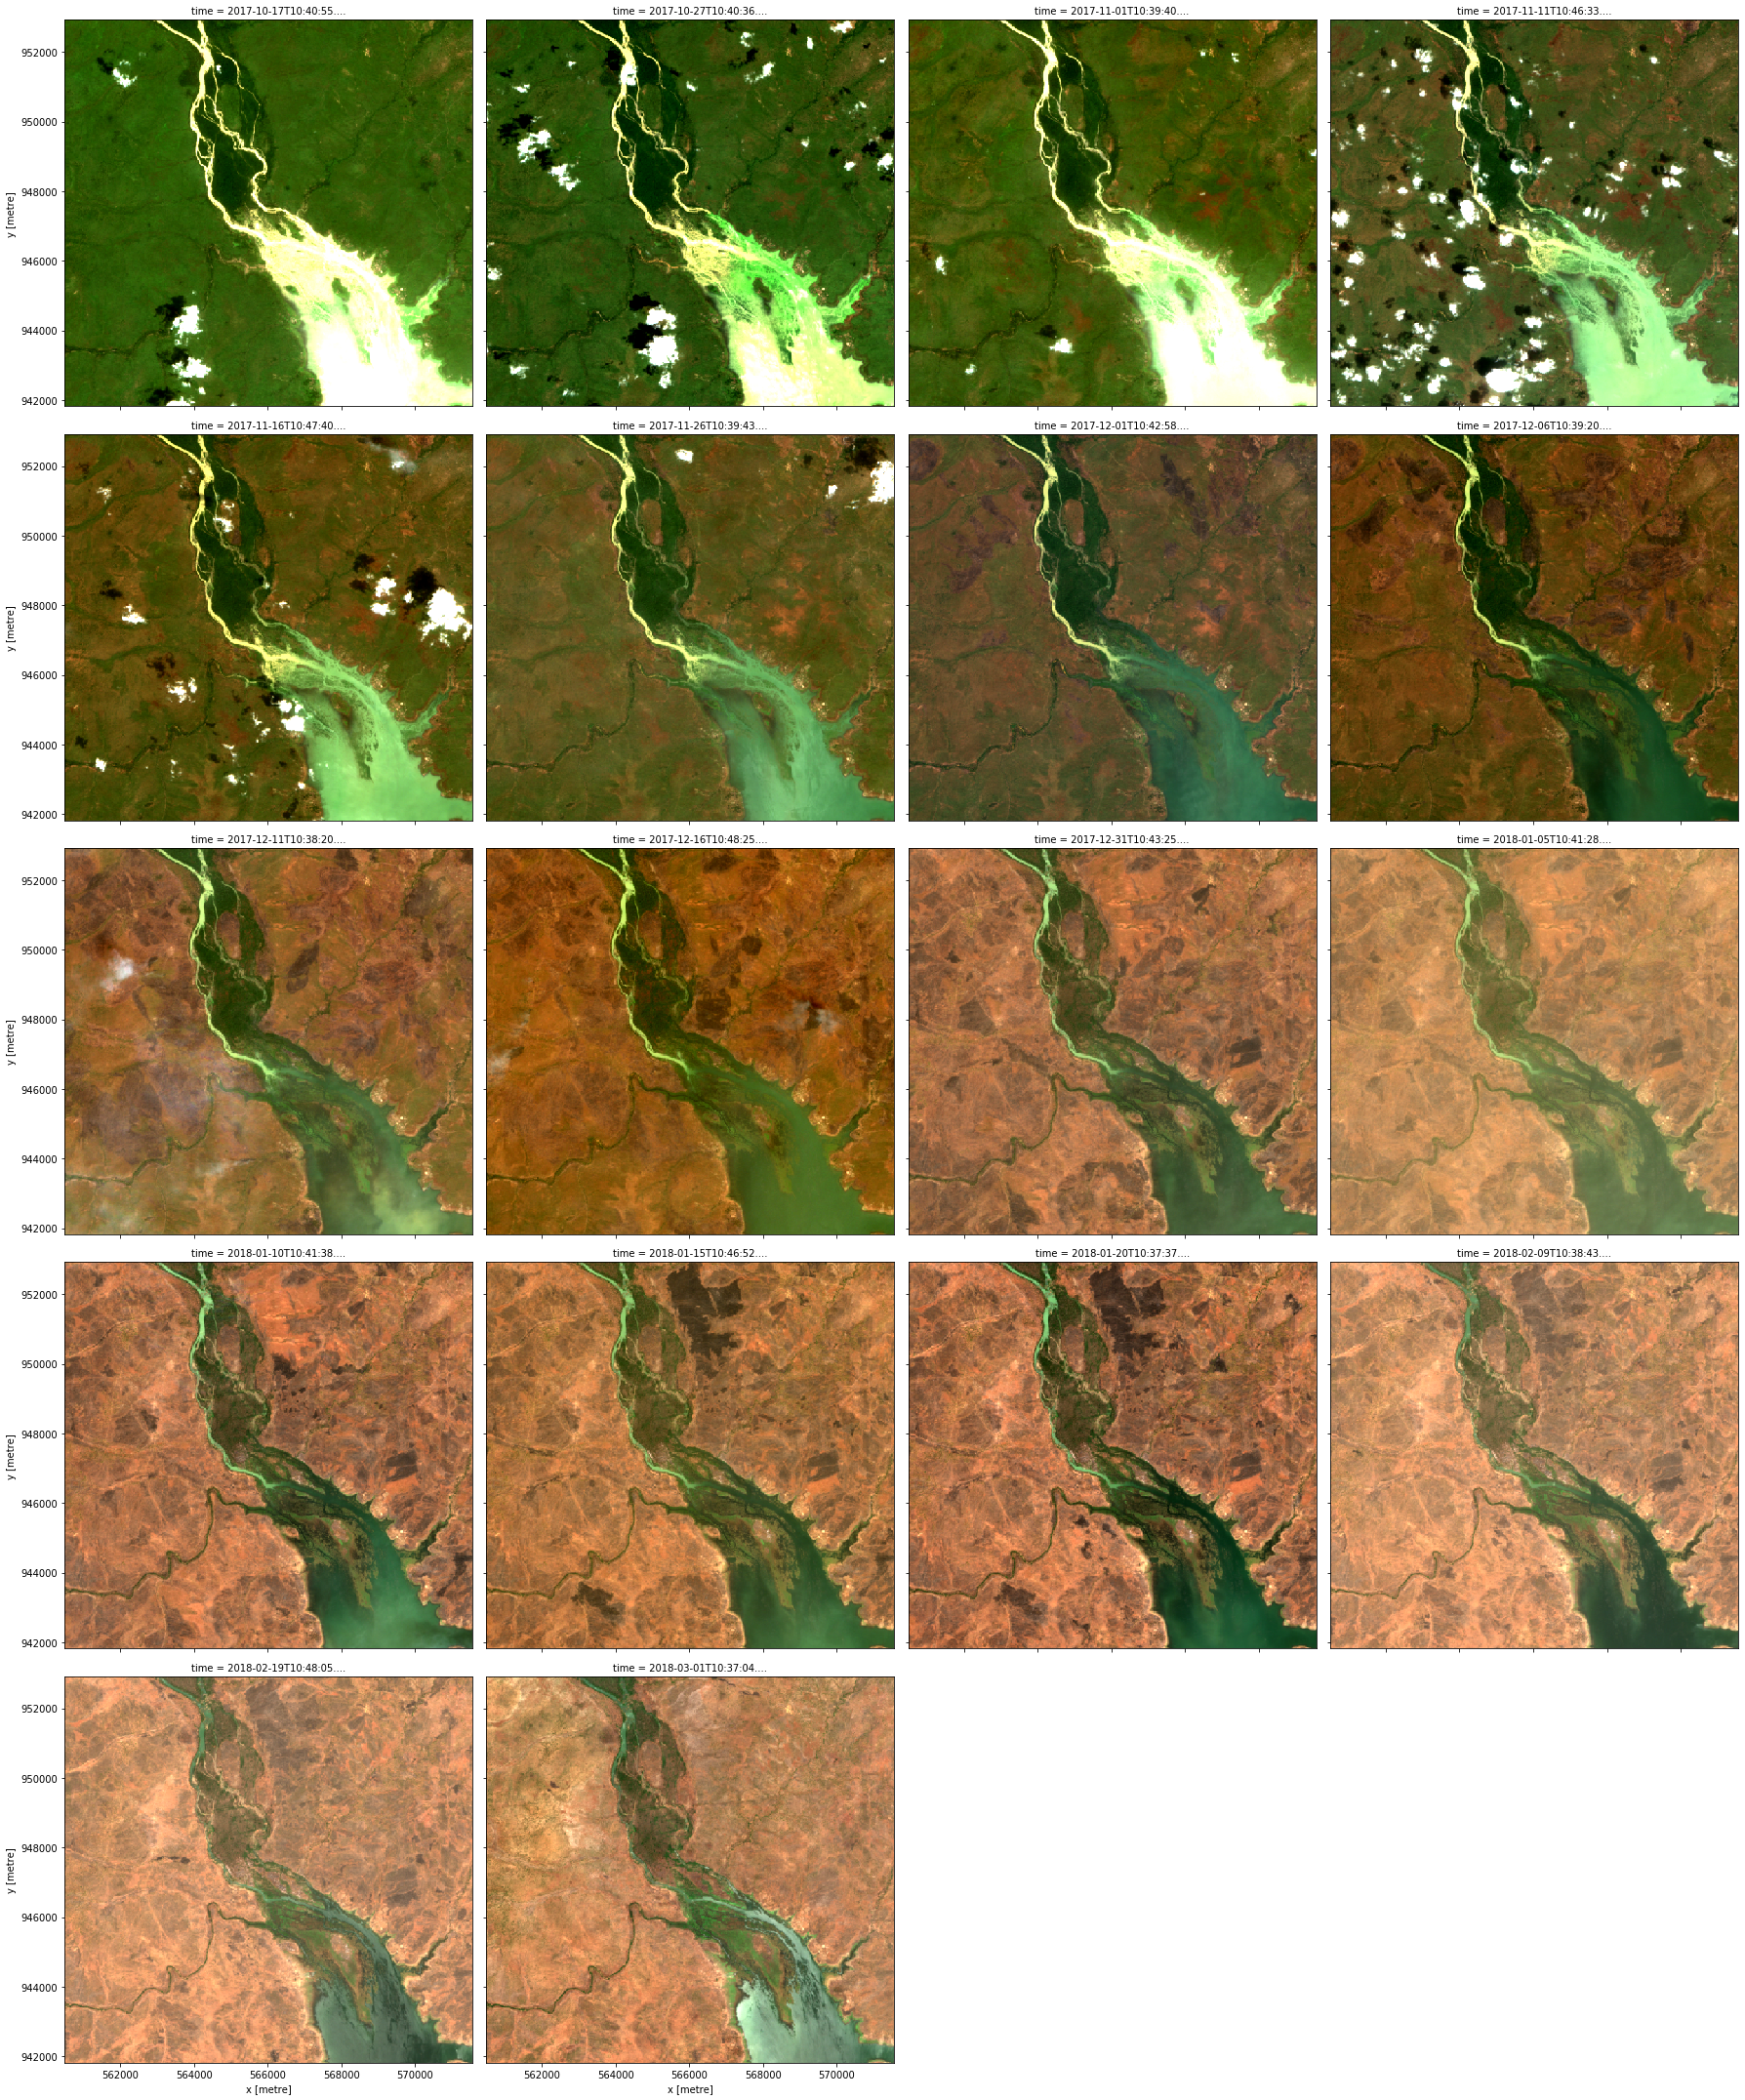

In [13]:
# Plot four images from the dataset
#rgb(ds, index=[0, 4, 8, 10, 14, 18, 25, 30, 35, 40, 43])
#rgb(ds, index=[0, 1, 8, 10, 13])
rgb(ds, index=list(range(18)))

Generating 19 frame animation
    Exporting animation to animated_timeseries.gif


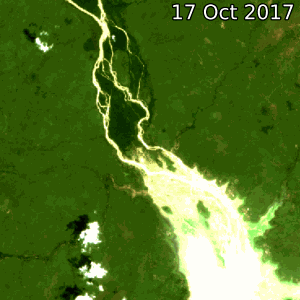

In [14]:
# Produce time series animation of red, green and blue bands
animated_timeseries(ds=ds, 
                    output_path='animated_timeseries.gif',                                
                    interval=200, 
                    width_pixels=300) 

# Plot animated gif
plt.close()
Image(filename='animated_timeseries.gif')
